In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.plotly as py
#import plotly.graph_objs as go

#py.offline.init_notebook_mode(connected=True)

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/SONY/Documents/CSV_Files/restrurent_rating_data.csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
data=data[data.Cuisines.isna()==False]

In [7]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [10]:
#data.drop(columns=["url", 'Address','phone','listed_in(city)'], inplace  =True)

In [12]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [13]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)

In [16]:
data['Restaurant Name'].value_counts().head()

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

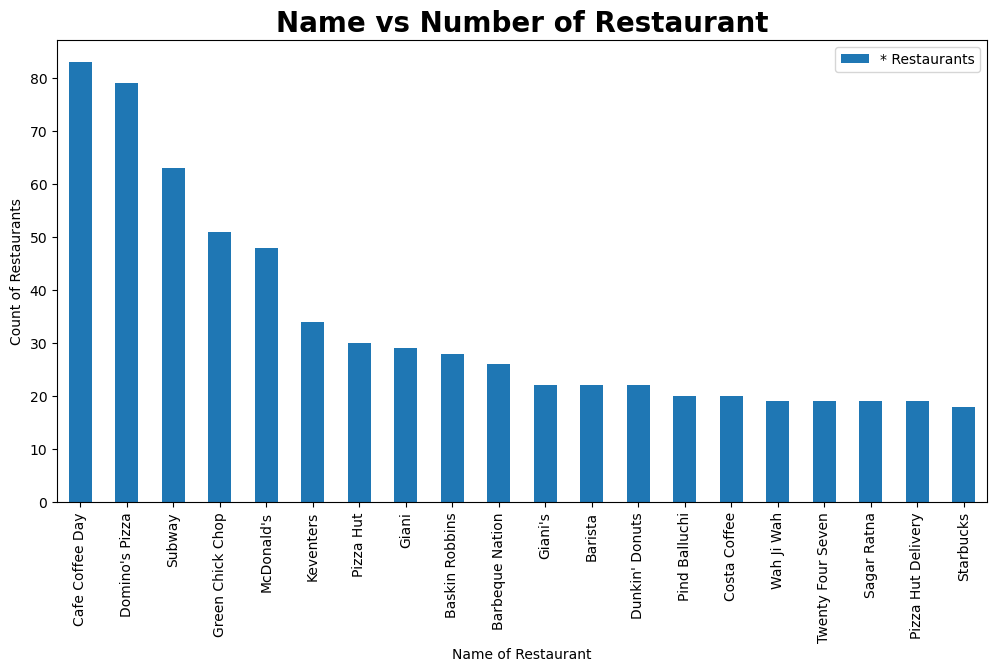

In [19]:
plt.figure(figsize = (12,6))
ax = data['Restaurant Name'].value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

In [21]:
data['Has Online delivery'].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [23]:
ax= sns.barplot(data['Has Online delivery'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

ValueError: could not convert string to float: 'No'

In [25]:
data['Has Table booking'].value_counts()

No     8384
Yes    1158
Name: Has Table booking, dtype: int64

In [26]:
sns.countplot(data['book_table'], palette= "Set1")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

KeyError: 'book_table'

In [28]:
data['City'].value_counts()[:10]

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: City, dtype: int64

Text(0.5, 1.0, 'Location')

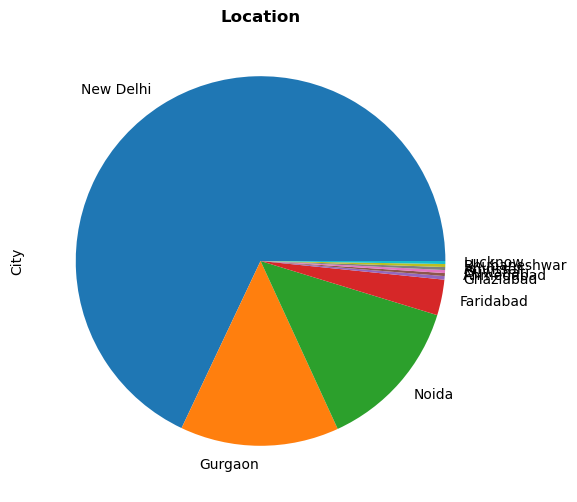

In [29]:
plt.figure(figsize=(12,6)) 
data['City'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

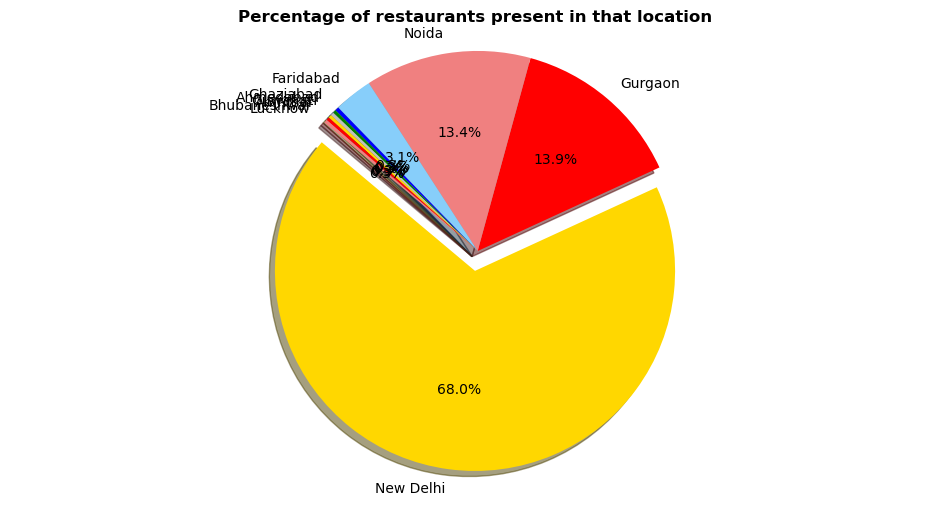

In [30]:
plt.figure(figsize = (12,6))
names = data['City'].value_counts()[:10].index
values = data['City'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()


Text(0.5, 1.0, 'Location vs Count')

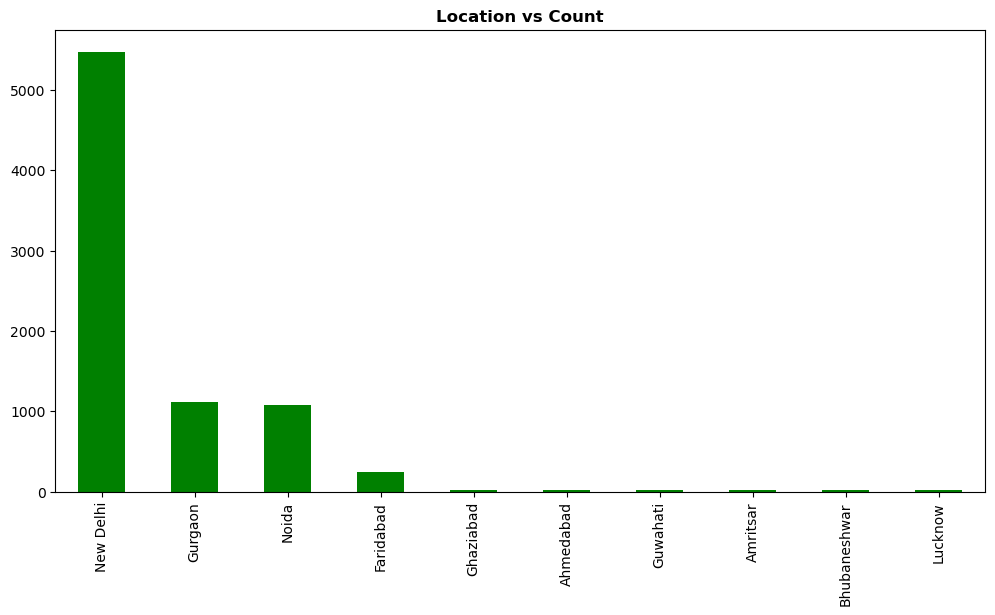

In [31]:
plt.figure(figsize = (12,6))
data['City'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [32]:
data['City'].nunique()

140

In [22]:
data['rest_type'].value_counts().head(10)

Quick Bites           19129
Casual Dining         10326
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           865
Bar                     697
Name: rest_type, dtype: int64

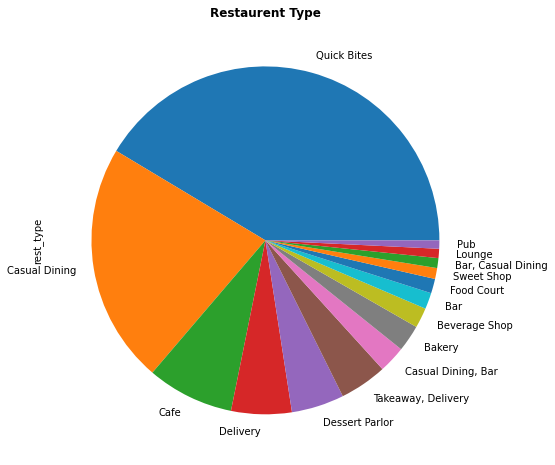

In [23]:
plt.figure(figsize = (14,8))
data.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [24]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

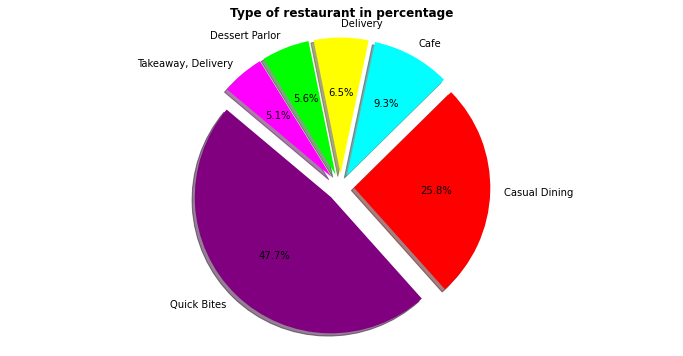

In [25]:
plt.figure(figsize = (12,6))
names = data['rest_type'].value_counts()[:6].index
values = data['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [33]:
data['Average Cost for two'].value_counts()[:20]

500     900
300     897
400     857
200     687
600     652
250     461
350     457
700     403
150     367
100     353
800     347
450     335
1000    281
1500    190
550     183
650     177
25      174
1200    145
10      125
40      112
Name: Average Cost for two, dtype: int64

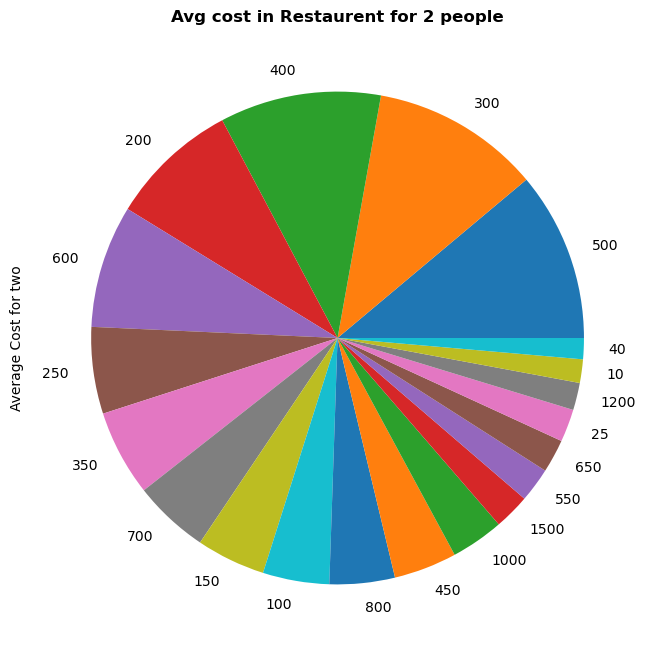

In [34]:
plt.figure(figsize = (12,8))
data['Average Cost for two'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [35]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

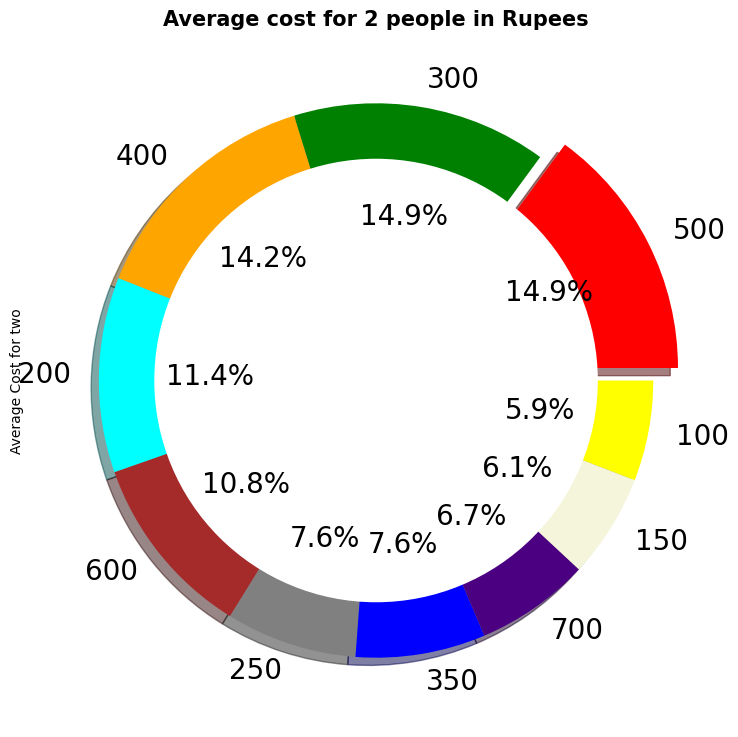

In [36]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Average Cost for two'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [40]:
data['Price range'] = data['Price range'].replace('NEW',np.NaN)
data['Price range'] = data['Price range'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [41]:
data['Price range'] = data.loc[:,'Price range'].replace('[ ]','',regex = True)
data['Price range'] = data['Price range'].astype(str)
data['Price range'] = data['Price range'].apply(lambda r: r.replace('/5',''))
data['Price range'] = data['Price range'].apply(lambda r: float(r))

1.8049675120519808


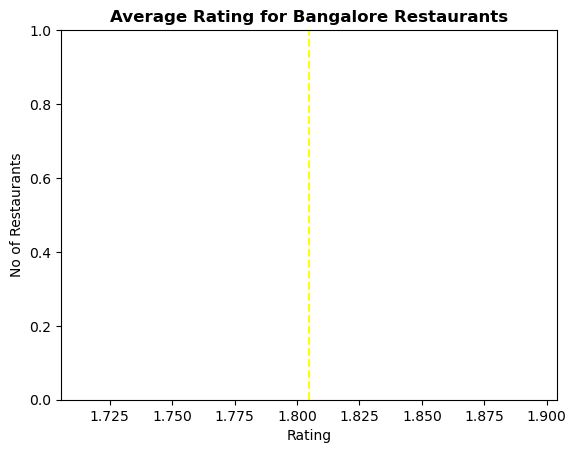

In [43]:
plt.axvline(x= data['Price range'].mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data['Price range'].mean())

In [44]:
#lets delete the nulll values
cuisines_data = data[data['Cuisines'].notnull()]
cuisines_data.Cuisines = cuisines_data.Cuisines.apply(lambda x:x.lower().strip())

In [45]:
cuisines_count= []

for i in cuisines_data.Cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

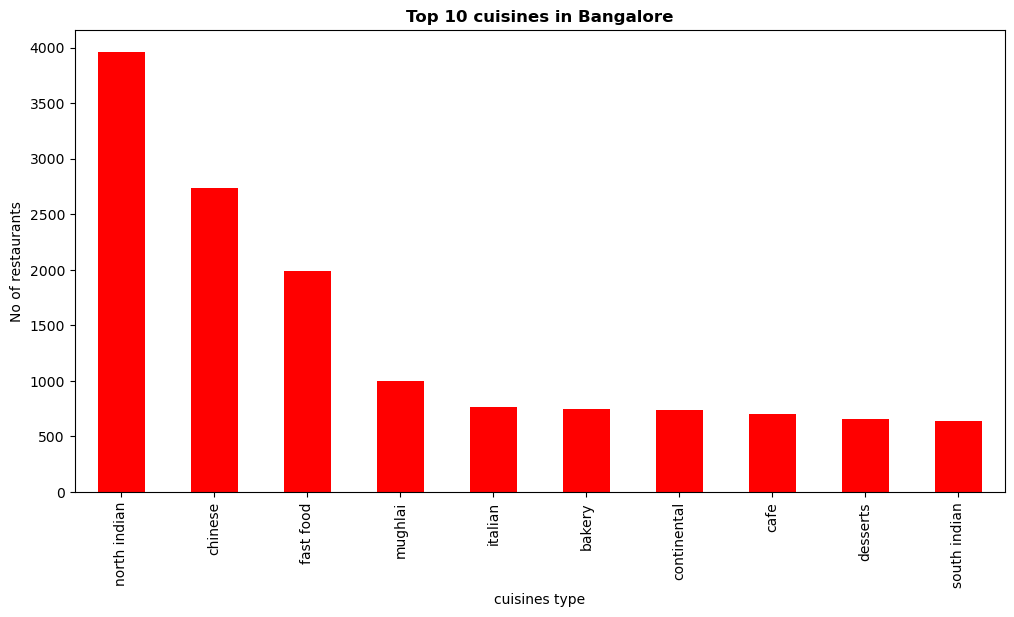

In [46]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Text(0.5, 1.0, 'rate vs oline order')

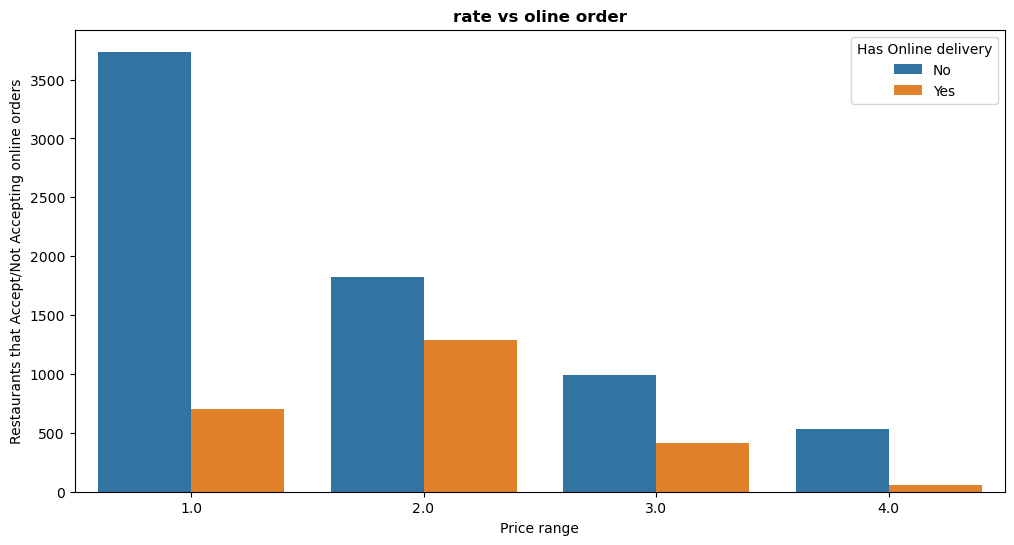

In [47]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['Price range'], hue = data['Has Online delivery'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [48]:
data['Has Online delivery']= pd.get_dummies(data['Has Online delivery'], drop_first=True)
data['Has Table booking']= pd.get_dummies(data['Has Table booking'], drop_first=True)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,No,No,3.0,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,No,No,3.0,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,No,No,4.0,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,No,No,4.0,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,No,No,4.0,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml? Gurme,208,??stanbul,"Kemanke?? Karamustafa Pa??a Mahallesi, R?ht?m ...",Karak?_y,"Karak?_y, ??stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),0,0,No,No,3.0,4.1,Green,Very Good,788
9547,5908749,Ceviz A??ac?,208,??stanbul,"Ko??uyolu Mahallesi, Muhittin ??st?_nda?? Cadd...",Ko??uyolu,"Ko??uyolu, ??stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),0,0,No,No,3.0,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,??stanbul,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",Kuru?_e??me,"Kuru?_e??me, ??stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),0,0,No,No,4.0,3.7,Yellow,Good,661
9549,5916112,A???k Kahve,208,??stanbul,"Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...",Kuru?_e??me,"Kuru?_e??me, ??stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),0,0,No,No,4.0,4.0,Green,Very Good,901


In [49]:
data['Cuisines'] = data['Cuisines'].str.replace(',' , '') 
data['Cuisines'] = data['Cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['Cuisines'].value_counts().head()

Indian North            936
Chinese Indian North    616
Indian Mughlai North    394
Fast Food               354
Chinese                 354
Name: Cuisines, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['City'] = T.fit_transform(data['City'])
data['Cuisines'] = T.fit_transform(data['Cuisines'])
data['Restaurant Name']=T.fit_transform(data['Restaurant Name'])

In [51]:
data["Average Cost for two"] = data["Average Cost for two"].str.replace(',' , '')

AttributeError: Can only use .str accessor with string values!

In [52]:
data["Average Cost for two"] = data["Average Cost for two"].astype('float')

In [78]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.310034,3743,2.547817,-0.190776,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",1.377641,-1.024849,0.514234,...,Botswana Pula(P),1,0,No,No,1.319726,1.407683,Dark Green,Excellent,0.365493
1,-0.311552,3168,2.547817,-0.190776,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",1.377315,-1.025915,1.197108,...,Botswana Pula(P),1,0,No,No,1.319726,1.209860,Dark Green,Excellent,1.009408
2,-0.312040,2894,2.547817,-0.103232,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",1.378352,-1.023399,-1.696975,...,Botswana Pula(P),1,0,No,No,2.424069,1.143919,Green,Very Good,0.263210
3,-0.309935,4701,2.547817,-0.103232,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",1.378344,-1.023043,1.220757,...,Botswana Pula(P),0,0,No,No,2.424069,1.473624,Dark Green,Excellent,0.484048
4,-0.310413,5516,2.547817,-0.103232,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",1.378369,-1.023122,1.200064,...,Botswana Pula(P),1,0,No,No,2.424069,1.407683,Dark Green,Excellent,0.167901


In [79]:
x = data.drop(['Price range','Restaurant ID'],axis = 1)

In [80]:
y = data['Price range']

In [81]:
x.shape

(9542, 19)

In [82]:
y.shape

(9542,)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   float64
 1   Restaurant Name       9542 non-null   int32  
 2   Country Code          9542 non-null   float64
 3   City                  9542 non-null   float64
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   float64
 10  Average Cost for two  9542 non-null   float64
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   uint8  
 13  Has Online delivery   9542 non-null   uint8  
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [85]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

In [86]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.310034,3743,2.547817,-0.190776,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",1.377641,-1.024849,0.514234,...,Botswana Pula(P),1,0,No,No,1.319726,1.407683,Dark Green,Excellent,0.365493
1,-0.311552,3168,2.547817,-0.190776,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",1.377315,-1.025915,1.197108,...,Botswana Pula(P),1,0,No,No,1.319726,1.209860,Dark Green,Excellent,1.009408
2,-0.312040,2894,2.547817,-0.103232,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",1.378352,-1.023399,-1.696975,...,Botswana Pula(P),1,0,No,No,2.424069,1.143919,Green,Very Good,0.263210
3,-0.309935,4701,2.547817,-0.103232,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",1.378344,-1.023043,1.220757,...,Botswana Pula(P),0,0,No,No,2.424069,1.473624,Dark Green,Excellent,0.484048
4,-0.310413,5516,2.547817,-0.103232,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",1.378369,-1.023122,1.200064,...,Botswana Pula(P),1,0,No,No,2.424069,1.407683,Dark Green,Excellent,0.167901


In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

ValueError: could not convert string to float: 'L-10, Near IGI Airport, Mahipalpur, New Delhi'

In [59]:
lr.score(X_test, y_test)*100

21.31919729540205

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.2653603458127483
Mean Squared Error: 0.1377346289755432
Root Mean Squared Error: 0.3711261631514857


In [61]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [62]:
rfr.score(X_test,y_test)*100

92.13546538009771

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.04419594928326371
Mean Squared Error: 0.013767256061233033
Root Mean Squared Error: 0.11733395101688612


In [64]:
####RIDGE
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [65]:
rdg.score(X_test,y_test)*100

21.319272304070157

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))

Mean Absolute Error: 0.26535785924489913
Mean Squared Error: 0.1377344976691671
Root Mean Squared Error: 0.3711259862488305


In [67]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [68]:
ls.score(X_test,y_test)*100

18.268849267687692

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))

Mean Absolute Error: 0.26860412543057505
Mean Squared Error: 0.14307441376931176
Root Mean Squared Error: 0.37825178620769495


In [70]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)

In [71]:
sv.score(X_test,y_test)*100

27.192449709207665

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_sv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_sv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sv)))

Mean Absolute Error: 0.23551657182398086
Mean Squared Error: 0.12745321070973847
Root Mean Squared Error: 0.35700589730386595


In [73]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set

In [74]:
knn.score(X_test,y_test)*100

46.5404892317514

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.2136328460877042
Mean Squared Error: 0.0935835124677558
Root Mean Squared Error: 0.3059142240363396


In [76]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.linear_model import BayesianRidge 
nb = BayesianRidge() 
nb.fit(X_train, y_train) 
  
# Model making a prediction on test data 
y_pred_nb = nb.predict(X_test) 

In [77]:
nb.score(X_test,y_test)*100

21.320846576124318

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_nb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_nb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nb)))

Mean Absolute Error: 0.265294584717832
Mean Squared Error: 0.1377317418282271
Root Mean Squared Error: 0.37112227341972764


In [79]:
onehot = pd.read_csv("E:/Sem5/UE18CS312_DA/Project_Nayana/zomato.csv")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [80]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN)
onehot['rate'] = onehot['rate'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True)
onehot['rate'] = onehot['rate'].astype(str)
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5',''))
onehot['rate'] = onehot['rate'].apply(lambda r: float(r))

In [81]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') 
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()

array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [82]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [83]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            179
Friendly Staff      68
Waffles             67
Biryani Chicken     66
Dosa Masala         56
Name: dish_liked, dtype: int64

In [84]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])

In [85]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)

In [86]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)

In [87]:
final['online_order']=pd.get_dummies(final['online_order'])
final['book_table']=pd.get_dummies(final['book_table'])
final

,online_order,book_table,rate,votes,approx_cost(for two people),Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,...,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
0,0,0,4.1,775,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4.1,787,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3.8,918,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3.7,88,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,3.8,166,600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,0,0,3.8,128,"1,200",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51707,1,1,3.9,77,"2,000",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51708,1,1,2.8,161,"1,200",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51711,1,1,2.5,81,800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
final['approx_cost(for two people)'] = final['approx_cost(for two people)'].str.replace(',' , '')

In [89]:
x = final.drop(['rate'],axis=1)
y = final['rate']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [92]:
lr.score(X_test,y_test)*100

-7706305245299491.0

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 505498.87839455035
Mean Squared Error: 12791919196584.729
Root Mean Squared Error: 3576579.2590944674


In [94]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [95]:
rdg.score(X_test,y_test)*100

89.3993870536936

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))

Mean Absolute Error: 0.07158288231648655
Mean Squared Error: 0.017596264348097426
Root Mean Squared Error: 0.13265091159919493


In [97]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [98]:
rfr.score(X_test,y_test)*100

93.22463801485321

In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.0379670180245969
Mean Squared Error: 0.011246619525546741
Root Mean Squared Error: 0.10605008027128852


In [100]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [101]:
ls.score(X_test,y_test)*100

19.562894832361998

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))

Mean Absolute Error: 0.2595940161481626
Mean Squared Error: 0.1335198797555043
Root Mean Squared Error: 0.36540372159503837


In [103]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
35957,4.0,4.000
4975,4.0,3.995
21830,3.9,3.898
11982,3.7,3.700
2597,3.8,3.823
...,...,...
14741,4.4,4.400
27804,3.8,3.720
23454,3.9,3.898
22723,3.3,3.324


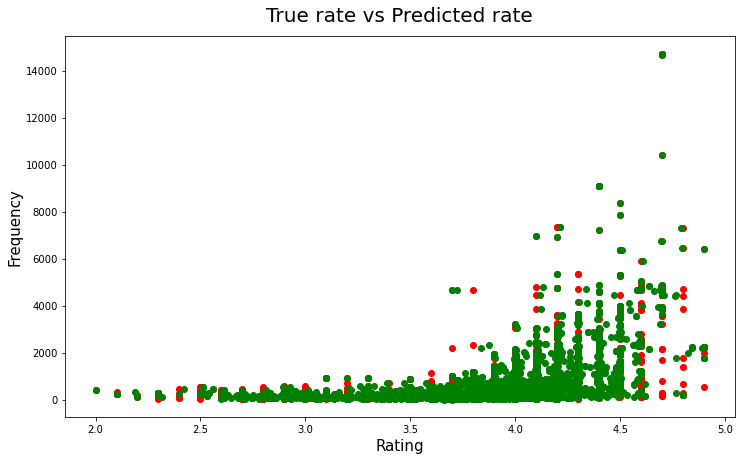

In [104]:
plt.figure(figsize=(12,7))
preds_rf = rfr.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,X_test.iloc[:,2],color="green")